# Instalacion de Matplotlib y Seaborn

In [ ]:
!pip install seaborn matplotlib

## Estructura basica de un grafico en matplotlib:
Definición de dimensiones del grafico
```python
plt.figure(
    #figsize=(10, 5),   # Tamaño
    #dpi=100.0          # Resolucion
    #facecolor='white'
    #...
)
```
Tipo de grafico que se va a generar
```python
plt.plot(
    x,                  # Valores en el eje x
    y,                  # Valores en el eje y
    color='blue',       # Color de la linea
    linestyle='--'      # Tipo de linea
)

```
(Optional) Agregar mas informacion a los graficos
```python
#Titulos
plt.title()
# Nombre del eje X
plt.xlabel()
# Nombre del eje Y
plt.ylabel()
# Limites de ejes
plt.xlim()
plt.ylim()
```

Mostrar el grafico
```python
plt.show()
```

Guardar el grafico
```python
plt.save()
```


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [6]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Ejemplos de Matplotlib

### Line Plot

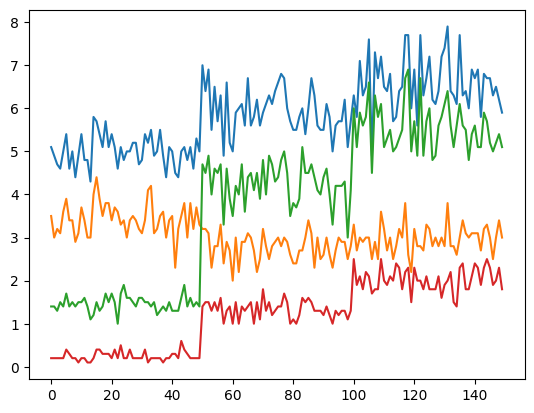

In [5]:
plt.figure()
plt.plot(iris['sepal_length'])
plt.plot(iris['sepal_width'])
plt.plot(iris['petal_length'])
plt.plot(iris['petal_width'])
plt.show()

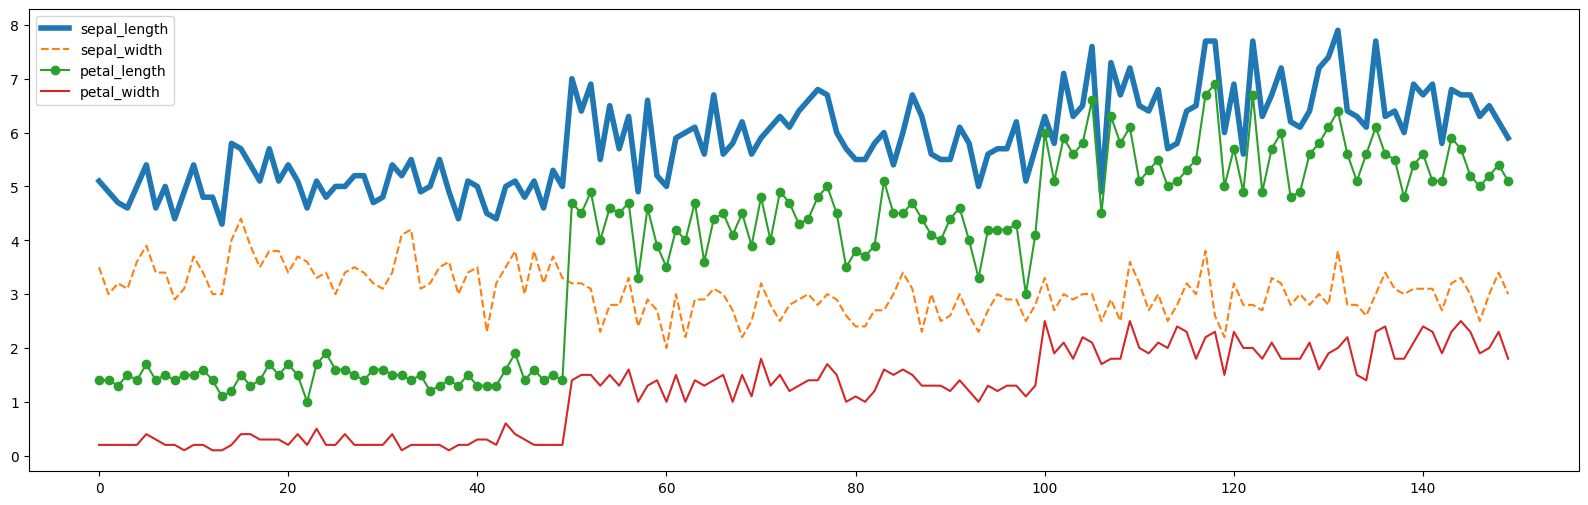

In [8]:
plt.figure(figsize=(20, 6))
plt.plot(iris['sepal_length'], label='sepal_length', linewidth=4)
plt.plot(iris['sepal_width'], label='sepal_width', linestyle='--')
plt.plot(iris['petal_length'], label='petal_length', marker='o')
plt.plot(iris['petal_width'], label='petal_width')
plt.legend()
plt.show()

### Scatter Plot

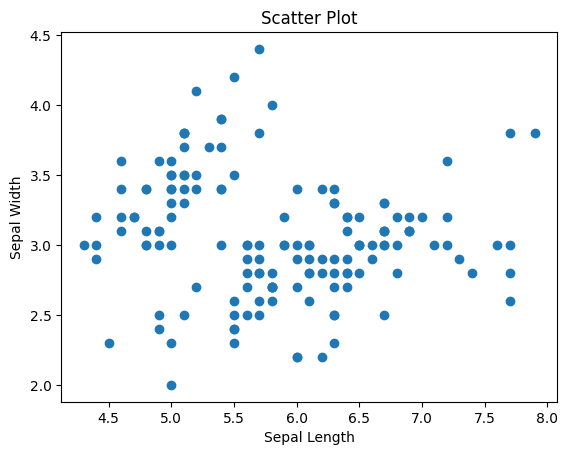

In [9]:
plt.scatter(iris['sepal_length'], iris['sepal_width'])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scatter Plot')
plt.show()

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

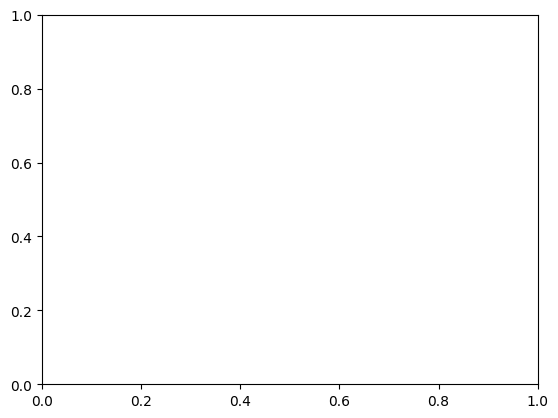

In [10]:
# Error
plt.scatter(iris['sepal_length'], iris['sepal_width'], c=iris['species'])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scatter Plot')
plt.show()

### Forma 1

In [11]:
species_dict = {"setosa": 0, "versicolor": 1, "virginica": 2}

In [12]:
iris["species_num"] = iris["species"].map(species_dict)
iris


,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


### Forma 2

In [15]:
iris["species"].factorize()

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 Index(['setosa', 'versicolor', 'virginica'], dtype='object'))

In [16]:
iris["species_num"] = iris["species"].factorize()[0]

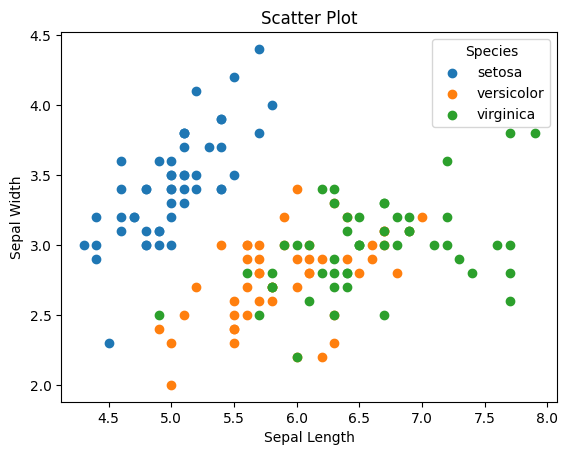

In [ ]:
# species_dict = {"setosa": 0, "versicolor": 1, "virginica": 2}
for species_name, species_num in species_dict.items():
    subset = iris[iris['species_num'] == species_num]
    plt.scatter(subset['sepal_length'], subset['sepal_width'], label=species_name)

# Add labels and title
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scatter Plot')

# Add legend
plt.legend(title='Species')

# Show the plot
plt.show()

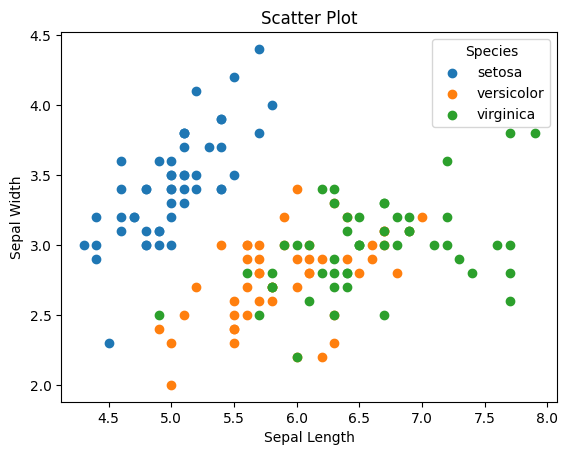

In [13]:
for species in iris['species'].unique():
    subset = iris[iris['species'] == species]
    plt.scatter(subset['sepal_length'], subset['sepal_width'], label=species)

# Add labels and title
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scatter Plot')

# Add legend
plt.legend(title='Species')

# Show the plot
plt.show()

## Histogramas

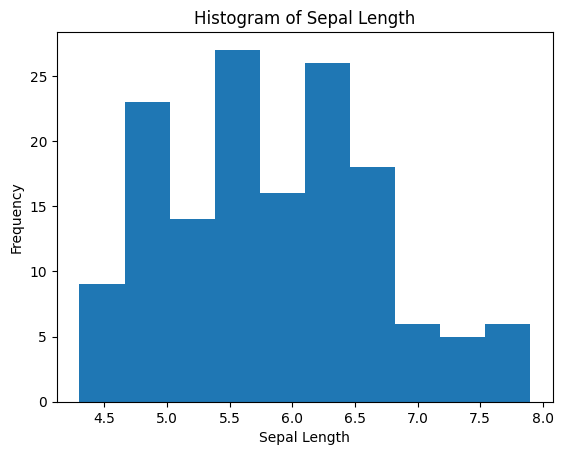

In [18]:
plt.hist(iris['sepal_length'])
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')
plt.title('Histogram of Sepal Length')
plt.show()

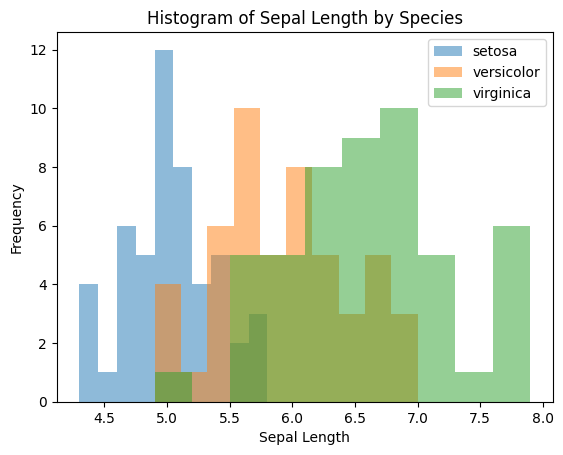

In [19]:
setosa = iris[iris['species'] == 'setosa']
versicolor = iris[iris['species'] == 'versicolor']
virginica = iris[iris['species'] == 'virginica']

plt.hist(setosa['sepal_length'], bins=10, alpha=0.5, label='setosa')
plt.hist(versicolor['sepal_length'], bins=10, alpha=0.5, label='versicolor')
plt.hist(virginica['sepal_length'], bins=10, alpha=0.5, label='virginica')

plt.xlabel('Sepal Length')
plt.ylabel('Frequency')
plt.title('Histogram of Sepal Length by Species')

plt.legend()

plt.show()

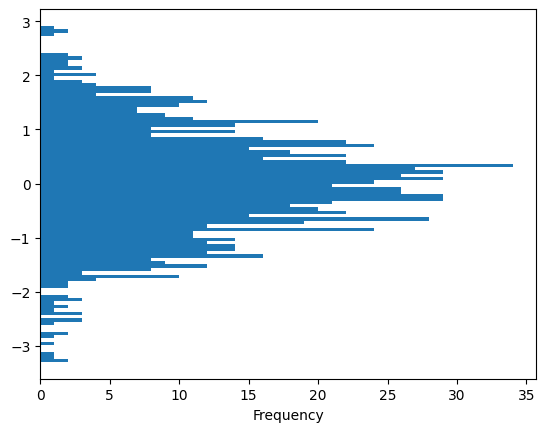

In [20]:
normal_rnd = np.random.normal(0, 1, 1000)
plt.hist(normal_rnd, bins=100, orientation='horizontal')
plt.xlabel('Frequency')
plt.show()

# Seaborn

In [21]:
import seaborn as sns

In [23]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


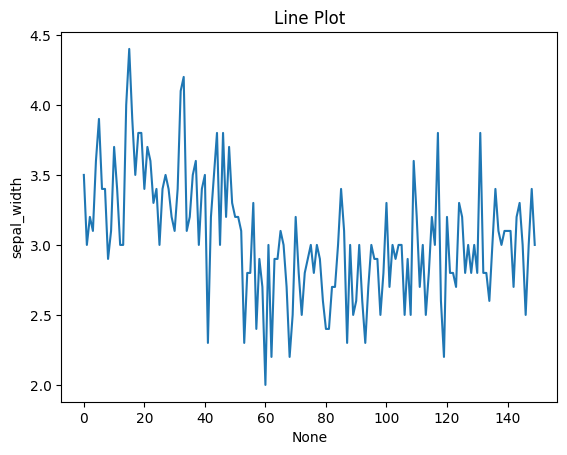

In [22]:
sns.lineplot(data=iris, x=iris.index, y='sepal_width')
plt.title('Line Plot')
plt.show()

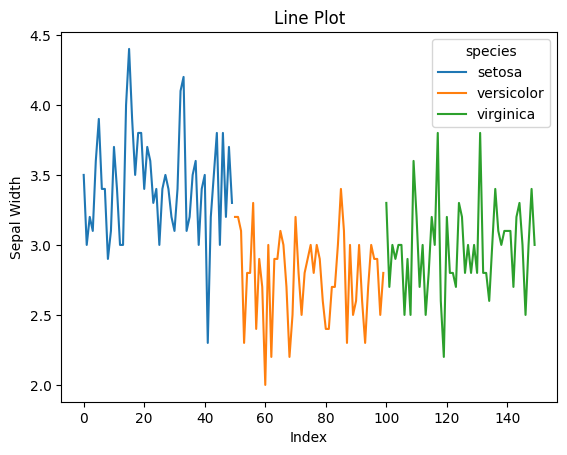

In [24]:
sns.lineplot(data=iris, x=iris.index, y='sepal_width', hue='species')
plt.xlabel('Index')
plt.ylabel('Sepal Width')
plt.title('Line Plot')
plt.show()

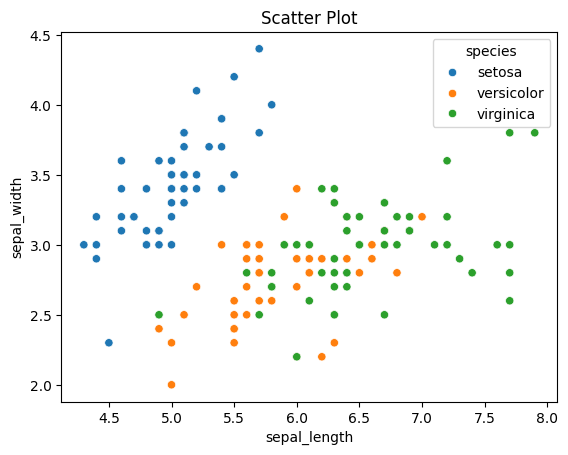

In [25]:
# grafico de dispersion
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='species')
plt.title("Scatter Plot")
plt.show()

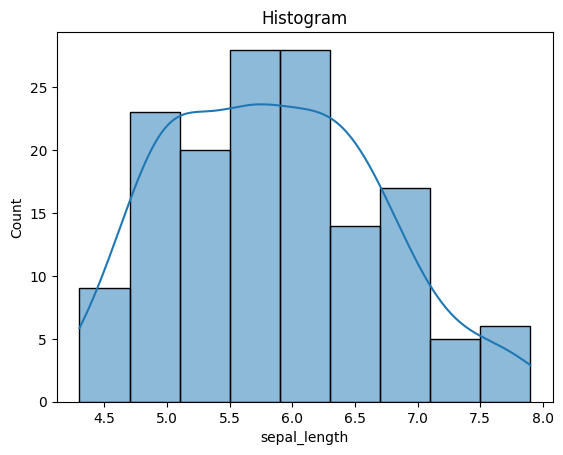

In [26]:
# Histogramas
sns.histplot(data=iris, x='sepal_length', kde=True)
plt.title("Histogram")
plt.show()

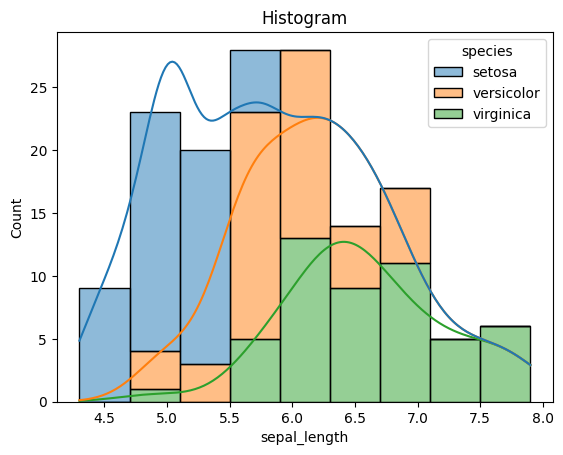

In [27]:
# Histograma separado por species
sns.histplot(data=iris, x='sepal_length', hue='species', multiple='stack', kde=True)
plt.title("Histogram")
plt.show()

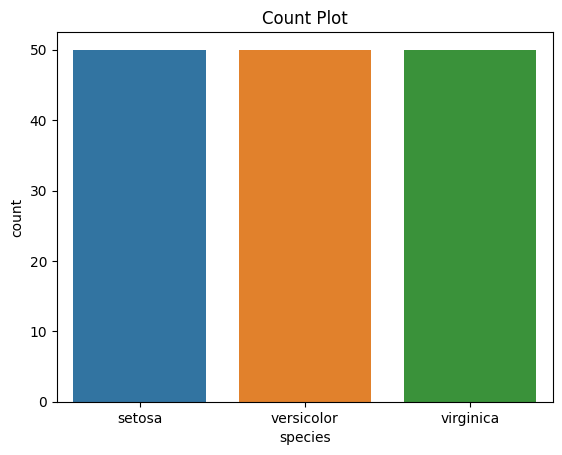

In [28]:
# Grafico de barras
sns.countplot(data=iris, x='species', hue='species')
plt.title("Count Plot")
plt.show()


In [30]:
species_counts = iris["species"].value_counts()

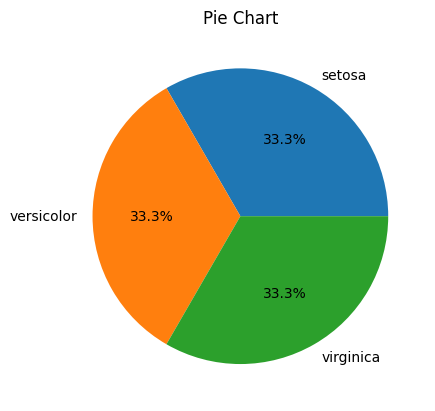

In [31]:
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%')
plt.title("Pie Chart")
plt.show()

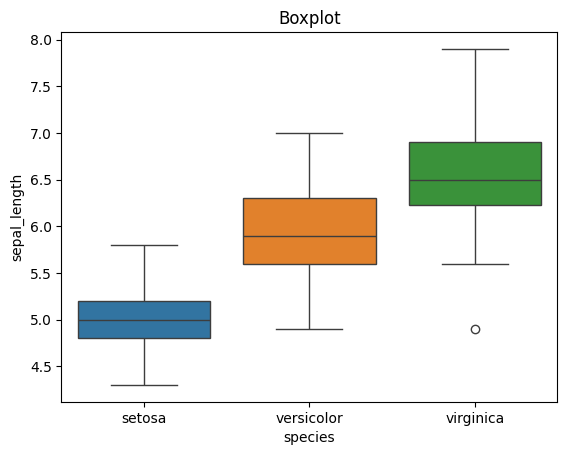

In [32]:
# Boxplot
sns.boxplot(data=iris, x='species', y='sepal_length', hue='species')
plt.title("Boxplot")
plt.show()

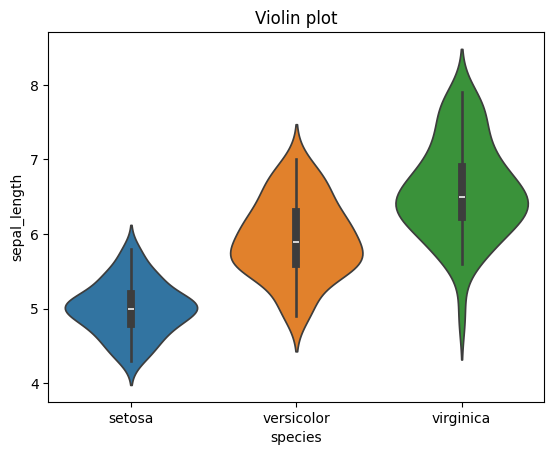

In [33]:
# Violin plot
sns.violinplot(data=iris, x='species', y='sepal_length', hue='species')
plt.title("Violin plot")
plt.show()

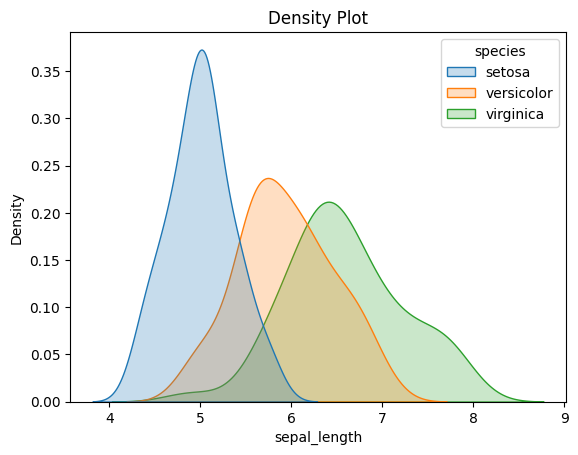

In [34]:
# Grafico de densidad
sns.kdeplot(data=iris, x='sepal_length', hue='species', fill=True)
plt.title("Density Plot")
plt.show()

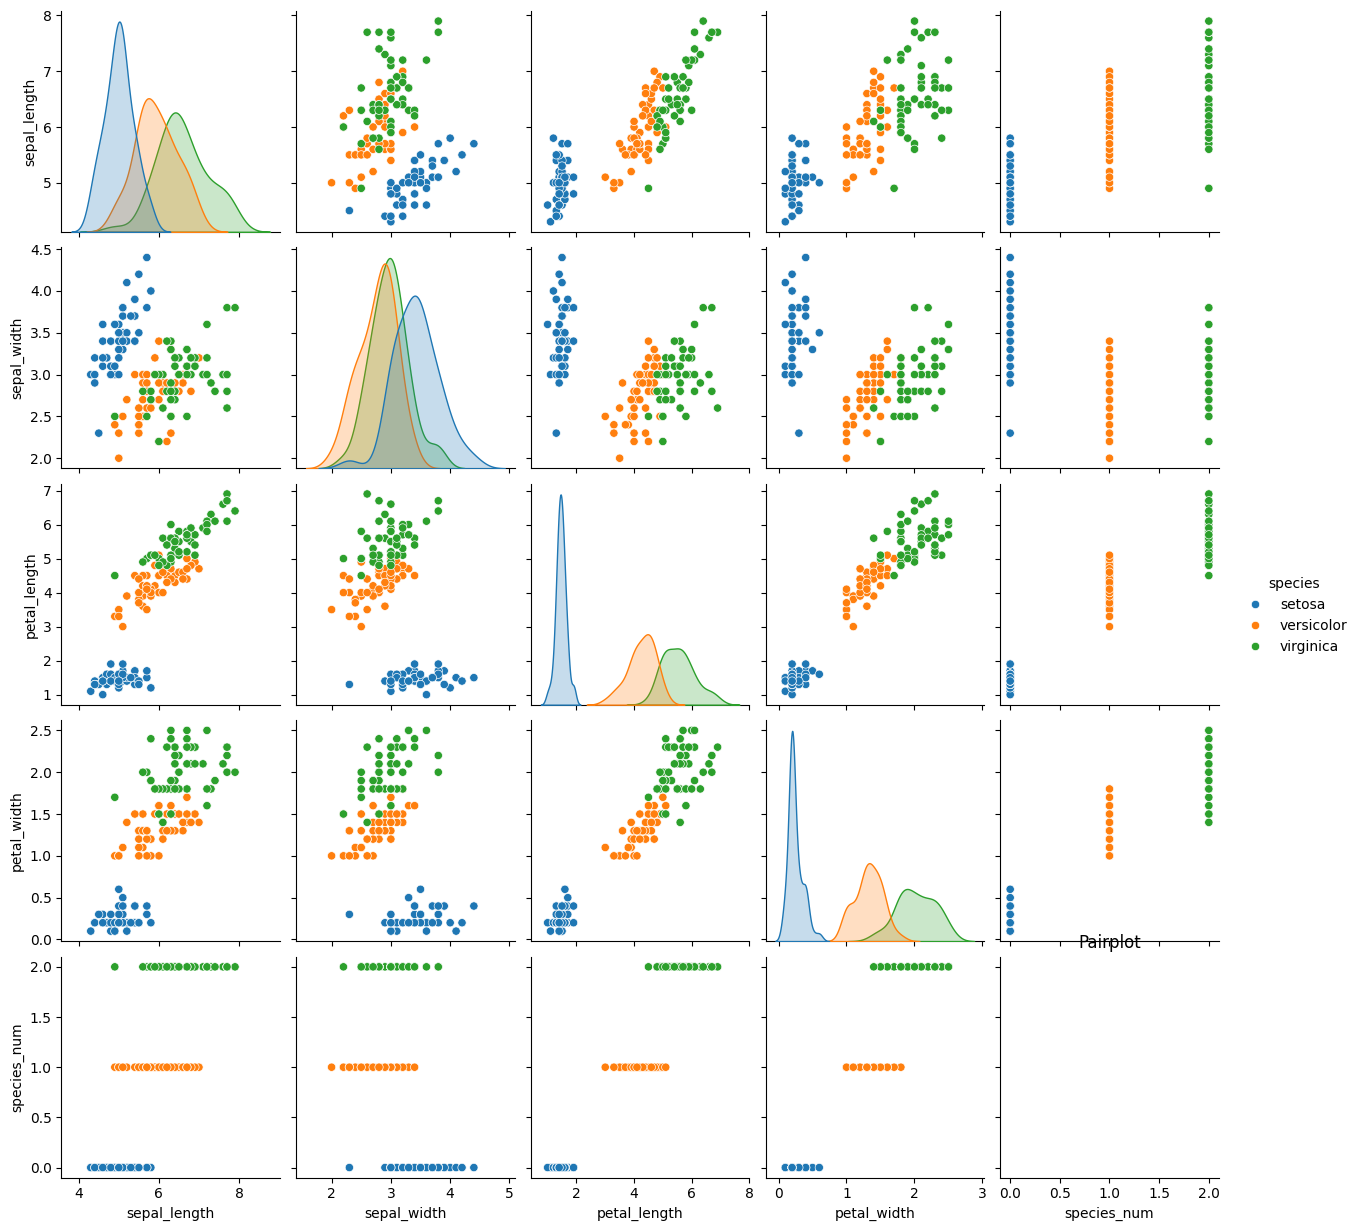

In [35]:
# Grafico de dispersion
sns.pairplot(iris, hue='species')
plt.title('Pairplot')
plt.show()


In [ ]:
# Drop the 'species' column
iris_no_species = iris.drop('species', axis=1)

# Heatmap
sns.heatmap(iris_no_species.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap')
plt.show()


## Subplots

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=iris, x='sepal_length', kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Sepal Length')

sns.histplot(data=iris, x='sepal_width', kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Sepal Width')

sns.histplot(data=iris, x='petal_length', kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Petal Length')

sns.boxplot(data=iris, x='species', y='petal_width', ax=axes[1, 1])
axes[1, 1].set_title('Petal Width')

plt.tight_layout()

plt.show()

## Estilos

In [3]:
# https://seaborn.pydata.org/tutorial/color_palettes.html
# pastel, deep, muted, bright, dark, colorblind
# hls, husl, Paired, Set2, Set3
sns.color_palette("deep")

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

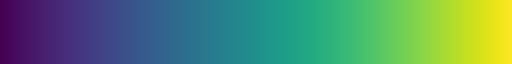

In [4]:
# crest, magma, inferno, plasma, viridis
sns.color_palette("viridis", as_cmap=True)

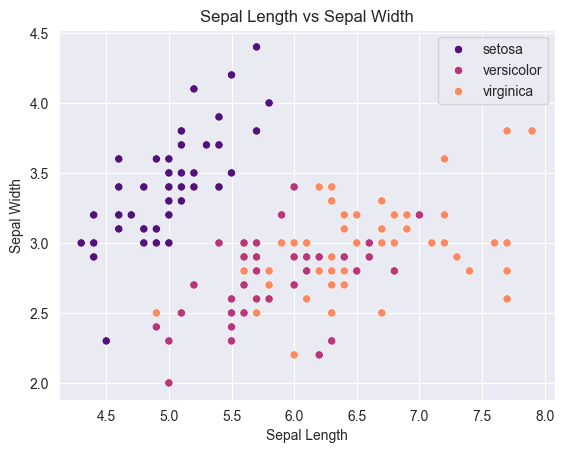

In [7]:
# darkgrid, whitegrid, dark, white, ticks
sns.set_style('darkgrid')

sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='species', palette='magma')

plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.legend()
plt.show()